## Simple linear regression model for King County House Sales data

Step 1: Import all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Step 2: Read training data from CSV

In [7]:
data = pd.read_csv("kc_house_train_data.csv", header=1, names={'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

Step 3: Get insights about the data

In [8]:
data.describe()

,bathrooms,sqft_above,sqft_living15,grade,yr_renovated,price,bedrooms,zipcode,long,sqft_lot15,sqft_living,floors,condition,lat,date,sqft_basement,yr_built,id,sqft_lot,view
count,1.738300e+04,1.738300e+04,17383.000000,17383.000000,17383.000000,1.738300e+04,17383.000000,17383.000000,17383.000000,17383.000000,17383.000000,17383.000000,17383.000000,17383.000000,17383.000000,17383.000000,17383.000000,17383.000000,17383.000000,17383.000000
mean,4.574202e+09,5.393849e+05,3.369384,2.115112,2080.081286,1.509245e+04,1.494276,0.007651,0.236093,3.410804,7.655065,1787.879480,292.201806,1971.153656,83.112754,98077.931140,47.559316,-122.213279,1986.032158,12776.790830
std,2.872373e+09,3.696940e+05,0.906489,0.771758,921.632115,4.146040e+04,0.539445,0.087138,0.768028,0.649803,1.169841,827.118536,444.411393,29.329310,398.703253,53.521775,0.138706,0.140910,686.515096,27176.458475
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.124084e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.049000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.468600,-122.328000,1490.000000,5100.000000
50%,3.892500e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571400,-122.229000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.000000,2.500000,2550.000000,1.066550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.677650,-122.125000,2360.000000,10066.500000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Step 4: Try plotting the data to get an intuition about the data points

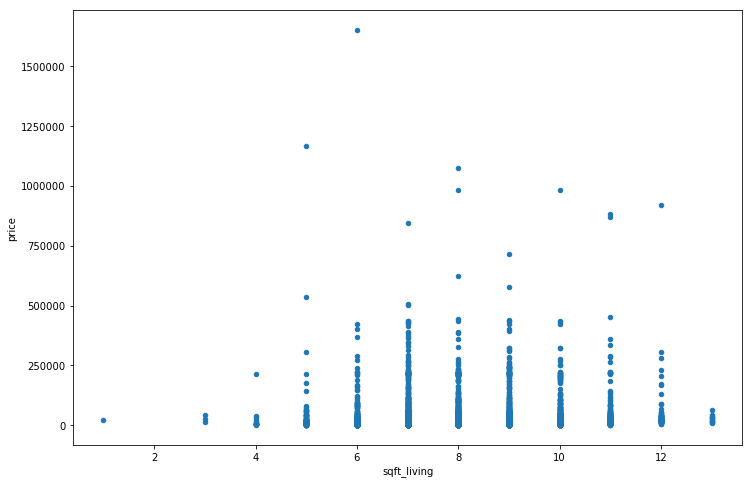

In [9]:
data.plot(kind="scatter", x="sqft_living", y="price", figsize=(12, 8))

Step 5: Function to compute the cost

In [30]:
def computeCost(x, y, theta):
    """
    Calculates the cost function J and returns it
    to the caller.
    
    Parameters
    ----------
    x : Nxd matrix
        N is number of samples and d is number of params
    y : Nx1 matrix
        The matrix storing the actual outputs
    theta: 1xd matrix
        The matrix storing regression parameters
    
    Returns
    -------
    float
        Overall cost for the current step
    """
    inner = np.power(x * theta.T - y, 2)
    return np.sum(inner) / (2 * len(x))

Step 6: Add a column of 1s to the column vector 'x'

In [15]:
data.insert(11, "ones", 1)

Step 7: Extract the columns 'ones' & 'sqft_living' and store it into a separate variable 'x'

In [34]:
x = data.iloc[:, 11:13]
x.head()

,ones,sqft_living
0,1,7
1,1,6
2,1,7
3,1,8
4,1,11


Step 8: Extract the house prices from data into a separate variable 'y'

In [35]:
y = data.iloc[:, 6:7]
y.head()

,price
0,7242
1,10000
2,5000
3,8080
4,101930


Step 9: Convert 'x' and 'y' into NumPy matrices

In [36]:
x = np.matrix(x.values)
print(x.shape)

y = np.matrix(y.values)
print(y.shape)

(17383, 2)
(17383, 1)


Step 10: Initialize theta

In [37]:
theta = np.matrix(np.array([0, 0]))
print(theta.shape)

(1, 2)


In [38]:
computeCost(x, y, theta)

973324156.58468044

Step 11: Function to perform gradient descent

In [99]:
def gradientDescent(x, y, theta, alpha, iters):
    """
    Performs gradient descent logic on the matrices
    passed as arguments and returns the regression
    parameters in the form of a column matrix along 
    with the overall cost involved.
    
    Parameters
    ----------
    x : Nxd matrix
        The matrix storing the values for selected 
        features
    y : Nx1 matrix
        The matrix storing the actual output values
    theta: Nx1 matrix
        The column vector storing the regression 
        parameters
    alpha: float
        The learning rate or the step size
    iters: int
        The number of iterations to be performed
    
    Returns
    -------
    theta: Nx1 matrix
        The column vector storing the new regression 
        parameters
    cost: Array[float]
        Residual sum of squares for each iteration
    """
    
    # Initialize a new column vector to store the
    # new regression paramters calculated in this
    # step
    theta_new = np.matrix(np.zeros(theta.shape))
    
    # Extract feature count from theta
    param_count = theta.ravel().shape[1]
    
    # Initialize an array to store the RSS for each 
    # iteration
    cost = np.zeros(iters)
    
    # Gradient descent logic
    for i in range(iters):
        # Calculate the residual
        error = x * theta.T - y
        
        # Process each feature vector
        for j in range(param_count):
            # Multiple the current feature vector 
            # with error
            term = np.multiply(error, x[:, j])
            
            # Calculate the new values for theta
            theta_new[0, j] = theta[0, j] - (alpha / len(x)) * np.sum(term)
        
        # Update theta with new values
        theta = theta_new
        
        # Calculate the overall RSS for this iteration
        cost[i] = computeCost(x, y, theta)
        
        if i % 100 == 0:
            print("Loss at iteration ", i, ": ", cost[i])
    
    return theta, cost

Initialize learning rate and number of iterations

In [79]:
alpha = 0.025
iters = 15000

Perform gradient descent

In [80]:
regParams, cost = gradientDescent(x, y, theta, alpha, iters)

Loss at iteration  0 :  884956992.006
Loss at iteration  1000 :  849823212.752
Loss at iteration  2000 :  849254256.506
Loss at iteration  3000 :  849069171.668
Loss at iteration  4000 :  849008962.474
Loss at iteration  5000 :  848989376.067
Loss at iteration  6000 :  848983004.492
Loss at iteration  7000 :  848980931.782
Loss at iteration  8000 :  848980257.516
Loss at iteration  9000 :  848980038.174
Loss at iteration  10000 :  848979966.821
Loss at iteration  11000 :  848979943.609
Loss at iteration  12000 :  848979936.058
Loss at iteration  13000 :  848979933.602
Loss at iteration  14000 :  848979932.803


In [55]:
print(regParams)

[[-13231.71952961   3704.73951584]]


### Using bedrooms to predict house prices

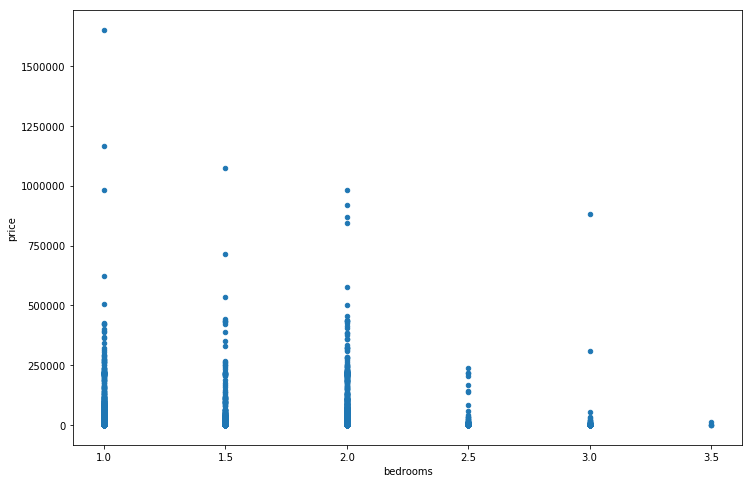

In [92]:
data.plot(kind="scatter", x="bedrooms", y="price", figsize=(12, 8))

In [90]:
data.insert(7, "bed_ones", 1)

In [100]:
x = data.iloc[:, 7:9]
x = np.matrix(x.values)
print(x.shape)

(17383, 2)


In [105]:
alpha = 0.02
iters = 5000

In [104]:
regParams, cost = gradientDescent(x, y, theta, alpha, iters)

Loss at iteration  0 :  959159725.763
Loss at iteration  100 :  864723731.646
Loss at iteration  200 :  863201433.462
Loss at iteration  300 :  862116556.575
Loss at iteration  400 :  861343380.892
Loss at iteration  500 :  860792350.038
Loss at iteration  600 :  860399638.514
Loss at iteration  700 :  860119758.828
Loss at iteration  800 :  859920292.724
Loss at iteration  900 :  859778136.186
